In [1]:
import os
import time
import requests
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
# 현재 작업 디렉토리 경로 얻기
current_directory = os.getcwd()
# 나눔바른고딕 글꼴 파일 경로 지정
font_path = os.path.join(current_directory, "NanumBarunGothic.ttf")

# 글꼴이 있는지 확인
if os.path.exists(font_path):
    # 폰트 추가
    fm.fontManager.addfont(font_path)

    # 캐시를 새로 고치지 않고 직접 폰트 설정
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams["axes.unicode_minus"] = False  # 마이너스 부호 출력 설정

In [3]:
df = pd.read_csv('D:\kdt_240424\workspace\m3_분석라이브러리\crawling\Yes24_books_data_0627.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14930 entries, 0 to 14929
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        14930 non-null  object 
 1   Author       14930 non-null  object 
 2   Publisher    14930 non-null  object 
 3   Price        14930 non-null  int64  
 4   Date         14930 non-null  object 
 5   Sales Index  14930 non-null  int64  
 6   Rating       14930 non-null  float64
 7   Year         14930 non-null  int64  
 8   Month        14930 non-null  int64  
 9   Category     14930 non-null  object 
 10  Gender       14930 non-null  int64  
 11  Age          14930 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Title,Author,Publisher,Price,Date,Sales Index,Rating,Year,Month,Category,Gender,Age
0,팬 하나로 충분한 두 사람 식탁,국가비,달,31500,2023년 06월,20880,9.4,2023,6,가정 살림,1,10
1,집에서 운영하는 작은 빵집 SOFT BREAD,호야,더테이블,29700,2023년 06월,21522,9.9,2023,6,가정 살림,1,10
2,베이킹은 과학이다,"나카야마 히로노리, 기무라 마키코",터닝포인트,20700,2017년 11월,11133,9.5,2023,6,가정 살림,1,10
3,맛있어서 지속 가능한 디디미니 다이어트 레시피,미니 박지우,빅피시,16920,2022년 05월,7632,9.9,2023,6,가정 살림,1,10
4,"사춘기 딸에게 힘이 되어주는, 부모의 말 공부",이현정,포레스트북스,15750,2023년 04월,14067,9.6,2023,6,가정 살림,1,10


In [5]:
print(df.describe(include='all'))

               Title Author Publisher          Price       Date   Sales Index  \
count          14930  14930     14930   14930.000000      14930  1.493000e+04   
unique          1842   1523       573            NaN        167           NaN   
top     문과 남자의 과학 공부    정선근       김영사            NaN  2023년 06월           NaN   
freq             186    288       393            NaN       1166           NaN   
mean             NaN    NaN       NaN   17768.750837        NaN  1.299026e+05   
std              NaN    NaN       NaN    7330.053458        NaN  1.774843e+05   
min              NaN    NaN       NaN    2700.000000        NaN  1.740000e+02   
25%              NaN    NaN       NaN   15120.000000        NaN  2.659200e+04   
50%              NaN    NaN       NaN   16650.000000        NaN  7.253100e+04   
75%              NaN    NaN       NaN   19800.000000        NaN  1.655760e+05   
max              NaN    NaN       NaN  160650.000000        NaN  1.263009e+06   

              Rating       

In [6]:
# def analyze_gender_preferences(df):
#     # 성별 레이블 매핑
#     gender_map = {1: '남성', 2: '여성'}
#     df['Gender'] = df['Gender'].map(gender_map)

#     # 1. 성별에 따른 카테고리 선호도
#     plt.figure(figsize=(12, 6))
#     sns.countplot(x='Category', hue='Gender', data=df)
#     plt.title('성별에 따른 카테고리 선호도')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

#     # 2. 성별에 따른 평균 구매 가격
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x='Gender', y='Price', data=df)
#     plt.title('성별에 따른 평균 구매 가격')
#     plt.show()

#     # 3. 성별에 따른 평균 평점
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x='Gender', y='Rating', data=df)
#     plt.title('성별에 따른 평균 평점')
#     plt.show()

#     # 4. 성별에 따른 판매 지수 분포
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='Gender', y='Sales Index', data=df)
#     plt.title('성별에 따른 판매 지수 분포')
#     plt.show()

#     # 5. 성별에 따른 top 5 베스트셀러
#     for gender in ['남성', '여성']:
#         print(f"\n{gender} Top 5 베스트셀러:")
#         top_5 = df[df['Gender'] == gender].nlargest(5, 'Sales Index')
#         print(top_5[['Title', 'Author', 'Sales Index']])

#     # 6. 성별에 따른 평균 통계
#     gender_stats = df.groupby('Gender').agg({
#         'Price': 'mean',
#         'Sales Index': 'mean',
#         'Rating': 'mean'
#     }).round(2)
#     print("\n성별에 따른 평균 통계:")
#     print(gender_stats)

In [7]:
# def gender_category_sales_pie(df):
#     # 성별 레이블 매핑
#     gender_map = {1: '남성', 2: '여성'}
#     df['Gender'] = df['Gender'].map(gender_map)

#     # 성별과 카테고리별로 판매지수 합계 계산
#     sales_by_gender_category = df.groupby(['Gender', 'Category'])['Sales Index'].sum().unstack()

#     # 파이 차트 생성
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
#     # 남성 파이 차트
#     male_sales = sales_by_gender_category.loc['남성'].sort_values(ascending=False)
#     ax1.pie(male_sales, labels=male_sales.index, autopct='%1.1f%%', startangle=90)
#     ax1.set_title('남성 카테고리별 판매지수 비율')

#     # 여성 파이 차트
#     female_sales = sales_by_gender_category.loc['여성'].sort_values(ascending=False)
#     ax2.pie(female_sales, labels=female_sales.index, autopct='%1.1f%%', startangle=90)
#     ax2.set_title('여성 카테고리별 판매지수 비율')

#     plt.tight_layout()
#     plt.show()

#     # 각 성별의 top 5 카테고리 출력
#     print("남성 Top 5 카테고리 (판매지수 기준):")
#     print(male_sales.head())
#     print("\n여성 Top 5 카테고리 (판매지수 기준):")
#     print(female_sales.head())

In [8]:
# 성별 레이블 매핑
gender_map = {0: '남성', 1: '여성'}
df['Gender'] = df['Gender'].map(gender_map)

# 성별과 카테고리별로 판매지수 합계 계산
sales_by_gender_category = df.groupby(['Gender', 'Category'])['Sales Index'].sum().unstack()

# 2023년과 2024년 데이터 분리
df_2023 = df[df['Year'] == 2023]
df_2024 = df[df['Year'] == 2024]

In [9]:
df.head()

,Title,Author,Publisher,Price,Date,Sales Index,Rating,Year,Month,Category,Gender,Age
0,팬 하나로 충분한 두 사람 식탁,국가비,달,31500,2023년 06월,20880,9.4,2023,6,가정 살림,여성,10
1,집에서 운영하는 작은 빵집 SOFT BREAD,호야,더테이블,29700,2023년 06월,21522,9.9,2023,6,가정 살림,여성,10
2,베이킹은 과학이다,"나카야마 히로노리, 기무라 마키코",터닝포인트,20700,2017년 11월,11133,9.5,2023,6,가정 살림,여성,10
3,맛있어서 지속 가능한 디디미니 다이어트 레시피,미니 박지우,빅피시,16920,2022년 05월,7632,9.9,2023,6,가정 살림,여성,10
4,"사춘기 딸에게 힘이 되어주는, 부모의 말 공부",이현정,포레스트북스,15750,2023년 04월,14067,9.6,2023,6,가정 살림,여성,10


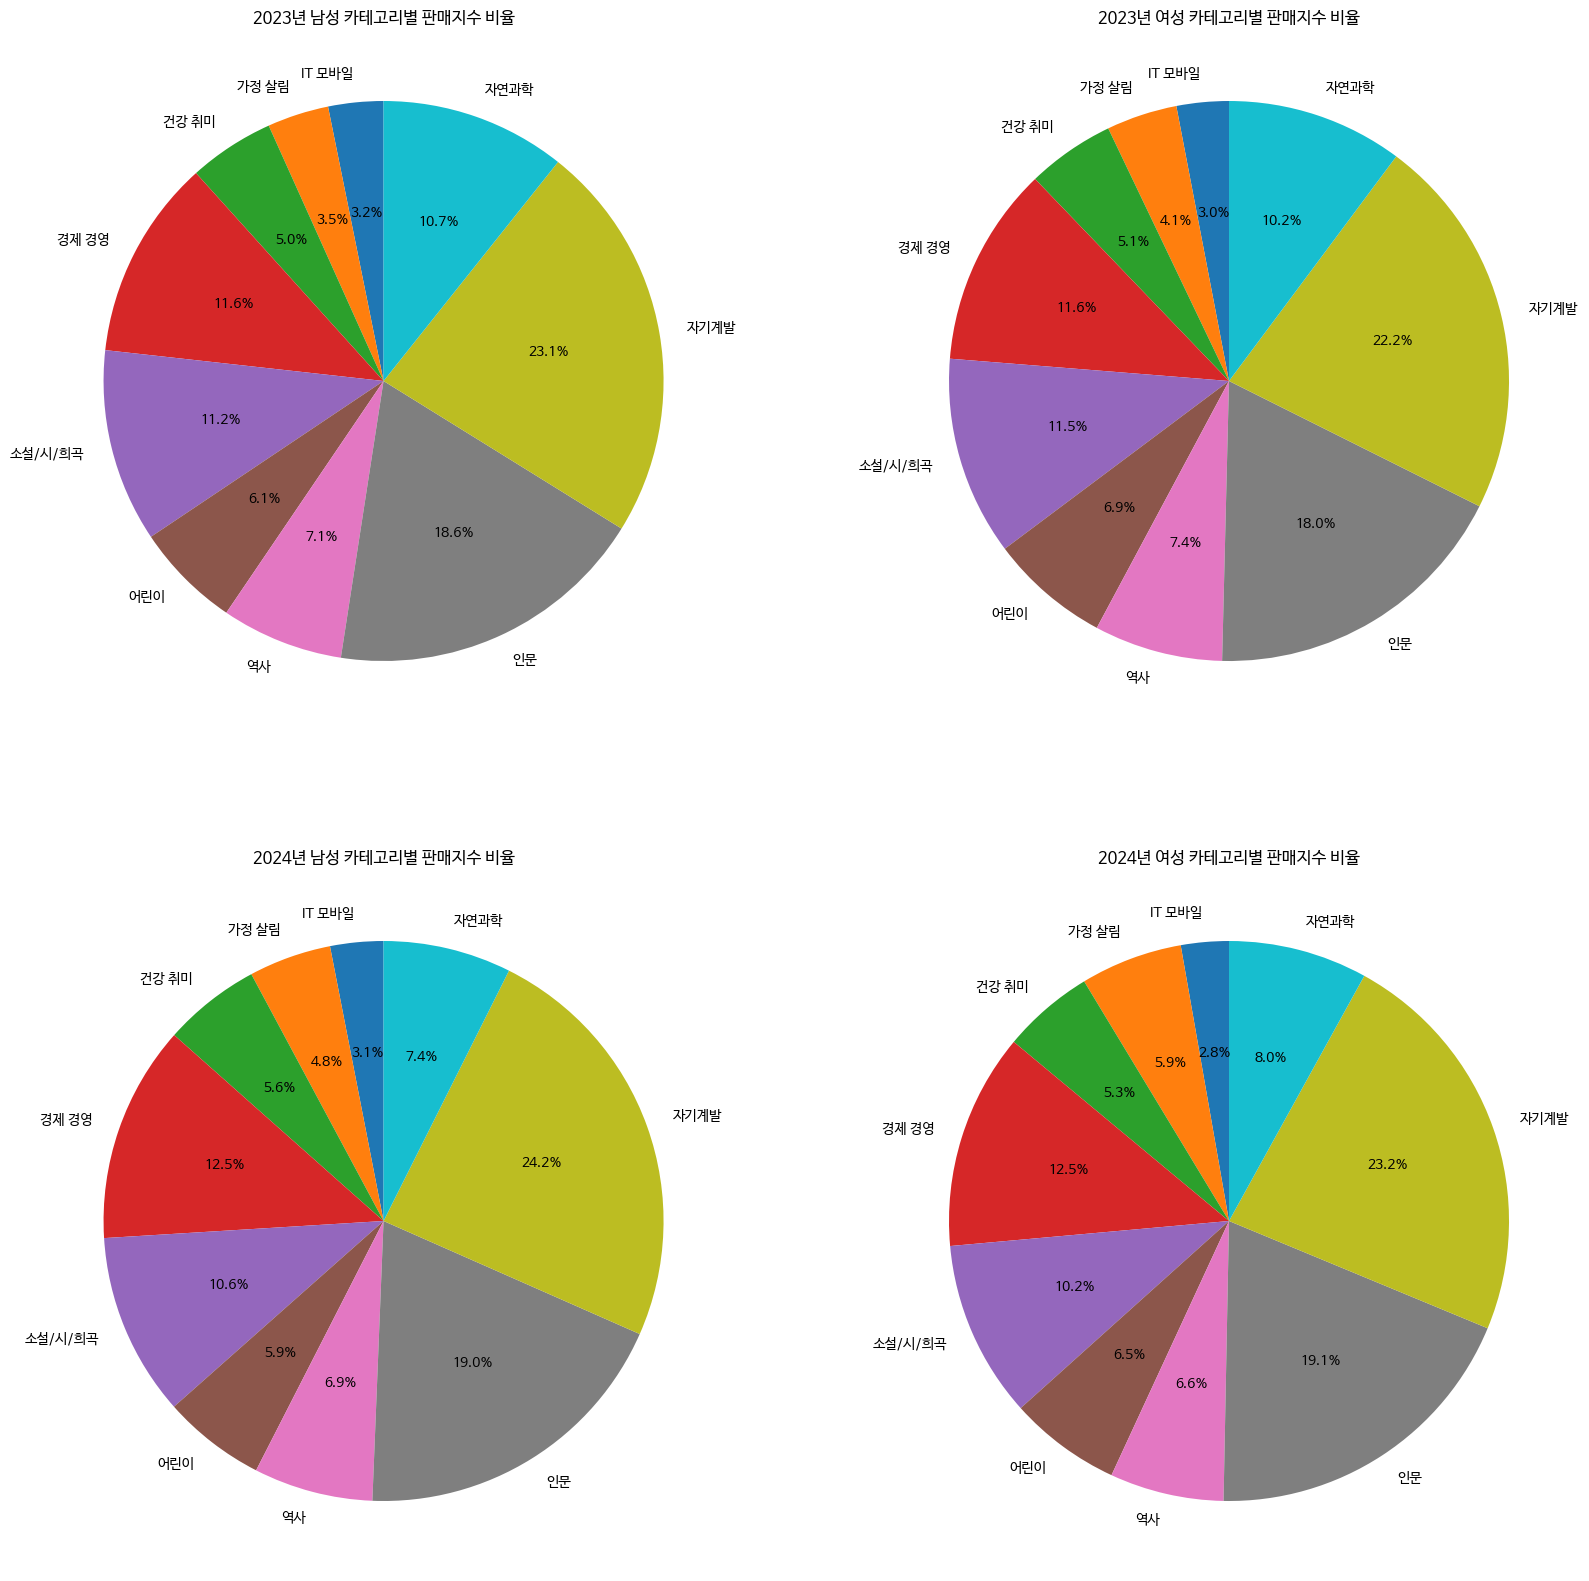

In [10]:
# 함수 정의: 파이 차트 생성
def create_pie_chart(data, gender, year, ax):
    sales_by_category = data[data['Gender'] == gender].groupby('Category')['Sales Index'].sum()
    ax.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{year}년 {gender} 카테고리별 판매지수 비율')

# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# 각 서브플롯에 파이 차트 그리기
create_pie_chart(df_2023, '남성', 2023, axs[0, 0])
create_pie_chart(df_2023, '여성', 2023, axs[0, 1])
create_pie_chart(df_2024, '남성', 2024, axs[1, 0])
create_pie_chart(df_2024, '여성', 2024, axs[1, 1])

1. - '소설/시/희곡/가정 살림' 카테고리는 여성에게서 약간 더 높은 비율을 보입니다.
   - '경제 경영/건강 취미' 카테고리는 남성에게서 조금 더 높은 비율을 나타냅니다.
2. - 2023년에서 2024년으로 넘어가면서 '자기계발' 카테고리의 비중이 약간 증가했습니다.
   - 'IT 모바일' 카테고리의 비중은 2024년에 다소 감소하는 추세를 보입니다.

In [11]:
# 1. 2023년 자료와 2024년 자료를 비교해서 보면 2023년도에 비해 자기계발, 인문, 경제경영, 건강취미 부분의 카테고리 부분의 지표가 오른 것을 볼 수 있습니다.
# 2. 2023년도에 비해 자연과학, 역사 부분의 지표는 떨어짐을 알 수 있습니다.

In [12]:
# # 파이 차트 생성
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# # 남성 파이 차트
# male_sales = sales_by_gender_category.loc['남성'].sort_values(ascending=False)
# ax1.pie(male_sales, labels=male_sales.index, autopct='%1.1f%%', startangle=90)
# ax1.set_title('남성 카테고리별 판매지수 비율')

# # 여성 파이 차트
# female_sales = sales_by_gender_category.loc['여성'].sort_values(ascending=False)
# ax2.pie(female_sales, labels=female_sales.index, autopct='%1.1f%%', startangle=90)
# ax2.set_title('여성 카테고리별 판매지수 비율')

# plt.tight_layout()
# plt.show()

# # # 각 성별의 top 5 카테고리 출력
# # print("남성 Top 5 카테고리 (판매지수 기준):")
# # print(male_sales.head())
# # print("\n여성 Top 5 카테고리 (판매지수 기준):")
# # print(female_sales.head())

In [ ]:
# # Date 컬럼 변환
# df['Date'] = pd.to_datetime(df['Date'], format='%Y년 %m월')

In [24]:
# 카테고리별 판매지수 평균
category_sales = df.groupby('Category')['Sales Index'].mean()
print(category_sales)

# 성별 판매지수 평균
gender_sales = df.groupby('Gender')['Sales Index'].mean()
print(gender_sales)

Category
IT 모바일      41693.528571
가정 살림       61412.869930
건강 취미       68853.202041
경제 경영      154094.908609
소설/시/희곡    137147.812987
어린이         81412.908553
역사          91791.847297
인문         236363.245098
자기계발       293472.556863
자연과학       117039.890132
Name: Sales Index, dtype: float64
Gender
남성    128052.995053
여성    131759.604966
Name: Sales Index, dtype: float64


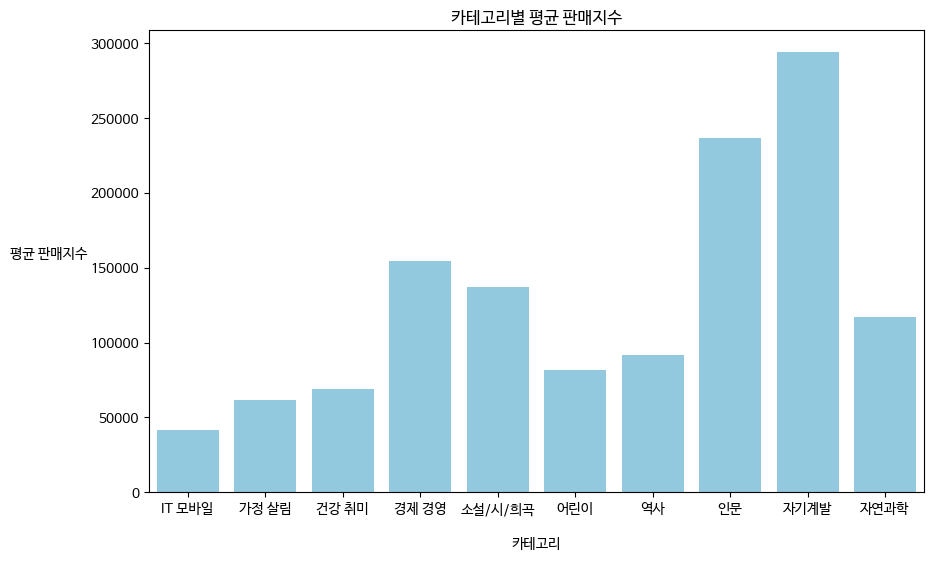

In [27]:
# 카테고리별 판매지수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, color='skyblue')
plt.xlabel('카테고리', labelpad=15)
plt.ylabel('평균 판매지수', rotation=0, labelpad=30)
plt.title('카테고리별 평균 판매지수')
# plt.xticks(rotation=45)
plt.show()

Age                  10             20             30             40  \
Category                                                               
IT 모바일     31745.565000   43971.672000   42707.448000   45970.512500   
가정 살림      28008.828571   52623.272727   84819.975000   81135.253846   
건강 취미      29240.571429   61124.308696   75504.324000   81165.992308   
경제 경영     151974.469565  180360.461538  160415.030769  152227.396154   
소설/시/희곡   110367.392308  147073.730769  152707.165385  147207.000000   
어린이        50397.378261   76226.880000   93957.173077   87917.273077   
역사         81652.350000   95105.912500   97971.761538   96172.984615   
인문        213463.591304  243333.946154  256492.650000  258788.042308   
자기계발      291793.872000  309383.584615  294105.196154  295439.838462   
자연과학      105028.982609  115567.488000  122667.484615  124134.103846   

Age                  50             60  
Category                                
IT 모바일     45409.932000   37936.385714  
가정 살림      5

<Figure size 1400x800 with 0 Axes>

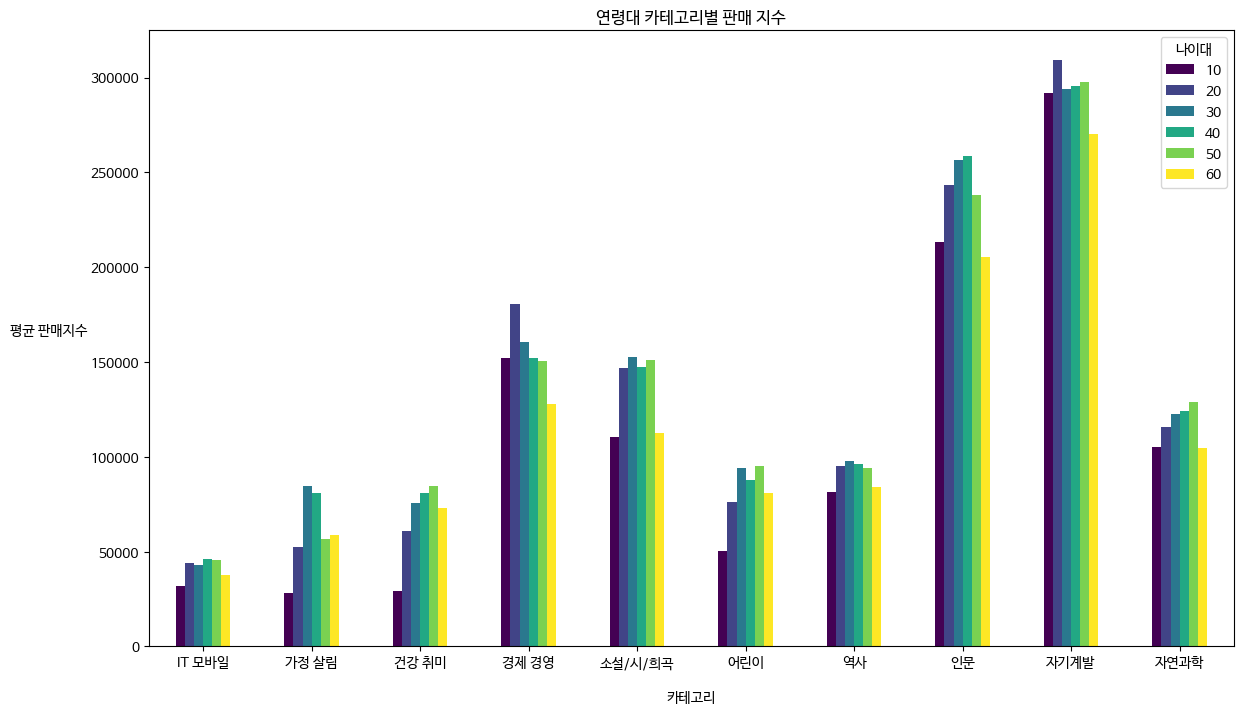

In [33]:
# 데이터 그룹화 및 평균 계산
category_age_sales = df.groupby(['Category', 'Age'])['Sales Index'].mean().unstack()

# 결과 출력
print(category_age_sales)

# 데이터 시각화
plt.figure(figsize=(14, 8))
category_age_sales.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14,8))
plt.xlabel('카테고리',labelpad=15)
plt.ylabel('평균 판매지수', rotation=0, labelpad=30)
plt.title('연령대 카테고리별 판매 지수')
plt.legend(title='나이대')
plt.xticks(rotation=0)
plt.show()

Gender               남성             여성
Category                              
IT 모바일     41591.475000   41801.585294
가정 살림      58777.128358   63736.484211
건강 취미      68071.195946   69645.920548
경제 경영     149389.087013  158991.506757
소설/시/희곡   135360.307792  138935.318182
어린이        75063.787013   87931.340000
역사         90277.893243   93305.801351
인문        233821.414286  238938.521053
자기계발      293990.329870  292947.971053
자연과학      115605.718421  118474.061842


<Figure size 1400x800 with 0 Axes>

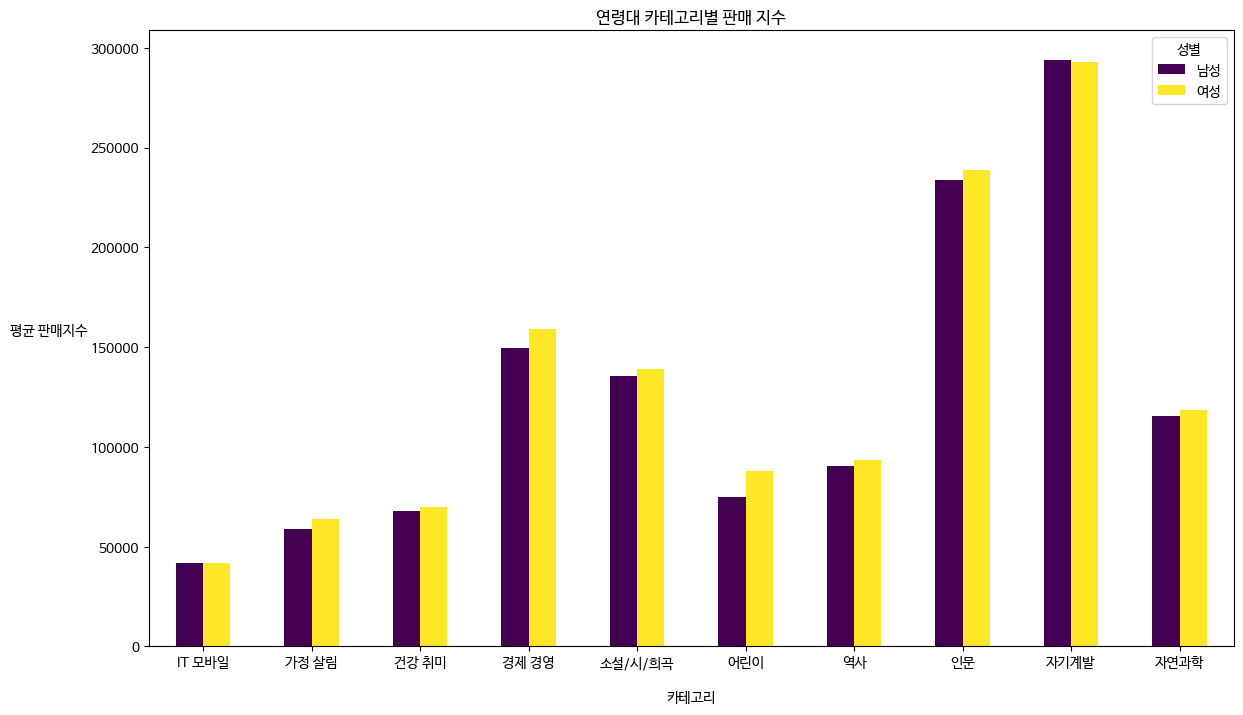

In [34]:
# 데이터 그룹화 및 평균 계산
category_gender_sales = df.groupby(['Category', 'Gender'])['Sales Index'].mean().unstack()

# 결과 출력
print(category_gender_sales)

# 데이터 시각화
plt.figure(figsize=(14, 8))
category_gender_sales.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14,8))
plt.xlabel('카테고리',labelpad=15)
plt.ylabel('평균 판매지수', rotation=0, labelpad=30)
plt.title('연령대 카테고리별 판매 지수')
plt.legend(title='성별')
plt.xticks(rotation=0)
plt.show()

In [29]:
# 카테고리별 평점 평균
category_rating = df.groupby('Category')['Rating'].mean()
print(category_rating)

Category
IT 모바일     9.602714
가정 살림      9.646923
건강 취미      9.590680
경제 경영      9.251391
소설/시/희곡    9.424221
어린이        9.831184
역사         9.561622
인문         9.289804
자기계발       9.223137
자연과학       9.423882
Name: Rating, dtype: float64


Category
IT 모바일     9.602714
가정 살림      9.646923
건강 취미      9.590680
경제 경영      9.251391
소설/시/희곡    9.424221
어린이        9.831184
역사         9.561622
인문         9.289804
자기계발       9.223137
자연과학       9.423882
Name: Rating, dtype: float64


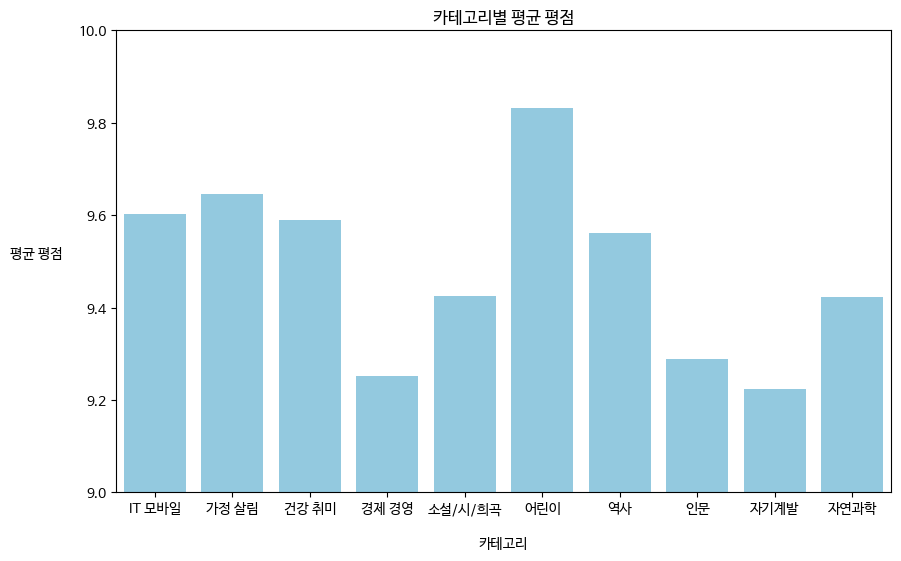

In [31]:
# 카테고리별 평균 평점 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=category_rating.index, y=category_rating, color='skyblue')
plt.xlabel('카테고리', labelpad=15)
plt.ylabel('평균 평점', rotation=0, labelpad=30)
plt.title('카테고리별 평균 평점')
plt.ylim(9, 10)  # y축 범위를 9에서 10으로 설정
# plt.xticks(rotation=45)
plt.show()

### 경제 경영, 자기계발, 인문 분야, 소설/시/희곡의 평점이 상대적으로 낮은 이유:
1. 호불호의 차이:
- 이 분야의 책들은 저자의 개인적인 경험, 의견, 스타일 등이 강하게 반영되어 있어서 독자들 사이에 호불호가 크게 갈릴 수 있음.
2. 주관적인 평가:
- 특히 소설, 시, 희곡은 독자의 취향에 따라 평가가 달라질 수 있음. 예술적인 측면이 강하게 작용하기 때문에 비평도 주관적일 가능성이 높음.
3. 자기계발서:
- 자기계발서는 다양한 접근 방식이 존재하기 때문에 특정 방법이 모든 독자에게 효과적이지 않을 수 있음. 따라서 이로 인해 평점이 낮아질 수 있음.
4. 독자층 분석:
- 경제 경영서는 주로 비즈니스 전문가들이 많이 읽을 것이고, 이들의 기대치가 높기 때문에 평점이 상대적으로 낮을 수 있음.
5. 출간 시기와 트렌드:
- 각 카테고리별로 출간된 시기와 현재 트렌드를 고려해보면, 특정 시기에 나온 책들이 평점에 미치는 영향을 분석할 수 있음. 최신 트렌드를 잘 반영한 책들은 평점이 높을 가능성이 큼.
5. 저자 분석:
- 특정 저자의 책들이 높은 평점을 받는 경향이 있다면, 저자의 명성이나 영향력이 평점에 미치는 영향을 분석해볼 수 있음.
6. 리뷰 내용 분석:
- 리뷰의 내용을 텍스트 마이닝 기법을 통해 분석하면, 평점이 높은 책과 낮은 책의 리뷰에서 어떤 키워드나 감정이 자주 등장하는지 파악할 수 있음.

### 어린이 도서의 높은 평점 이유
1. 교육적 가치와 긍정적 피드백:
- 어린이 도서는 주로 교육적 가치를 지니고 있고, 부모나 교육자가 리뷰를 작성할 때 교육적인 효과를 긍정적으로 평가하는 경우가 많음.
2. 낮은 비평 기준:
- 어린이 도서는 내용이 단순하고 명확한 경우가 많아 상대적으로 비평이 덜 엄격하게 이루어질 수 있음. 또한, 리뷰를 작성하는 부모나 보호자들이 자녀의 긍정적인 반응에 기반해 높은 평점을 줄 가능성큼.
3. 작은 독자층:
- 어린이 도서의 독자층은 상대적으로 한정되어 있어서 평점을 주는 사람들의 평가 기준이 비교적 일관될 수 있음. 특히, 어린이 도서는 재미와 교육적 가치가 잘 결합된 경우 평점이 높아지기 쉬움.